# __Cleaning Method 1__
## Normalization -> Z-Score -> 3 STD

In [3]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [6]:
data = pd.read_csv('../../Capstone/Data/FirstClean_MLB_Pitching_Data.csv')

## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [7]:
data.skew()

age                      0.745195
mlb_ID                   0.834533
year_ID                 -0.396846
stint_ID                 3.469638
G                        0.765744
GS                       1.258301
IPouts                   1.178460
IPouts_start             1.464618
IPouts_relief            1.362543
RA                       1.082143
xRA                      1.148962
xRA_sprp_adj             0.459597
xRA_def_pitcher          0.104837
PPF                      1.091220
PPF_custom               1.279763
xRA_final                1.222322
BIP                      1.178940
BIP_perc                 1.148256
RS_def_total            -0.123042
runs_above_avg           1.187162
runs_above_avg_adj       1.148079
runs_above_rep           1.799902
RpO_replacement          0.148842
GR_leverage_index_avg    1.610771
WAR                      1.984215
salary                   3.706152
teamRpG                 -0.019408
oppRpG                   1.706578
pyth_exponent            0.415471
waa_win_perc  

**_Applying the yeojohnson normalization method actually increased the skew in my data, therefore I removed the cells_**

In [8]:
data.dtypes

name_common               object
age                      float64
mlb_ID                   float64
player_ID                 object
year_ID                    int64
team_ID                   object
stint_ID                   int64
lg_ID                     object
G                          int64
GS                         int64
IPouts                     int64
IPouts_start             float64
IPouts_relief            float64
RA                         int64
xRA                      float64
xRA_sprp_adj             float64
xRA_def_pitcher          float64
PPF                        int64
PPF_custom               float64
xRA_final                float64
BIP                        int64
BIP_perc                 float64
RS_def_total             float64
runs_above_avg           float64
runs_above_avg_adj       float64
runs_above_rep           float64
RpO_replacement          float64
GR_leverage_index_avg    float64
WAR                      float64
salary                   float64
teamRpG   

In [9]:
data.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'G', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj', 'xRA_def_pitcher', 'PPF',
       'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc', 'RS_def_total',
       'runs_above_avg', 'runs_above_avg_adj', 'runs_above_rep',
       'RpO_replacement', 'GR_leverage_index_avg', 'WAR', 'salary', 'teamRpG',
       'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA', 'WAA_adj',
       'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep', 'WAR_rep',
       'ERA_plus', 'ER_lg'],
      dtype='object')

## Z Score

In [10]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['name_common', 'player_ID', 'team_ID', 'lg_ID'], axis=1)

In [11]:
data_num.columns

Index(['age', 'mlb_ID', 'year_ID', 'stint_ID', 'G', 'GS', 'IPouts',
       'IPouts_start', 'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'WAR',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep', 'ERA_plus', 'ER_lg'],
      dtype='object')

In [12]:
data_objects=data.drop(['age', 'mlb_ID', 'year_ID', 'stint_ID', 'G', 'GS', 'IPouts',
       'IPouts_start', 'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'WAR',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep', 'ERA_plus', 'ER_lg'], axis=1)

In [13]:
data_objects.head()

,name_common,player_ID,team_ID,lg_ID
0,David Aardsma,aardsda01,SFG,NL
1,David Aardsma,aardsda01,CHC,NL
2,David Aardsma,aardsda01,CHW,AL
3,David Aardsma,aardsda01,BOS,AL
4,David Aardsma,aardsda01,SEA,AL


In [14]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num = scaler.fit_transform(data_num)
data_num_zs = pd.DataFrame(data_num)

In [15]:
data_num_zs.columns=['age', 'mlb_ID', 'year_ID', 'stint_ID', 'G', 'GS', 'IPouts',
       'IPouts_start', 'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'WAR',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep', 'ERA_plus', 'ER_lg']

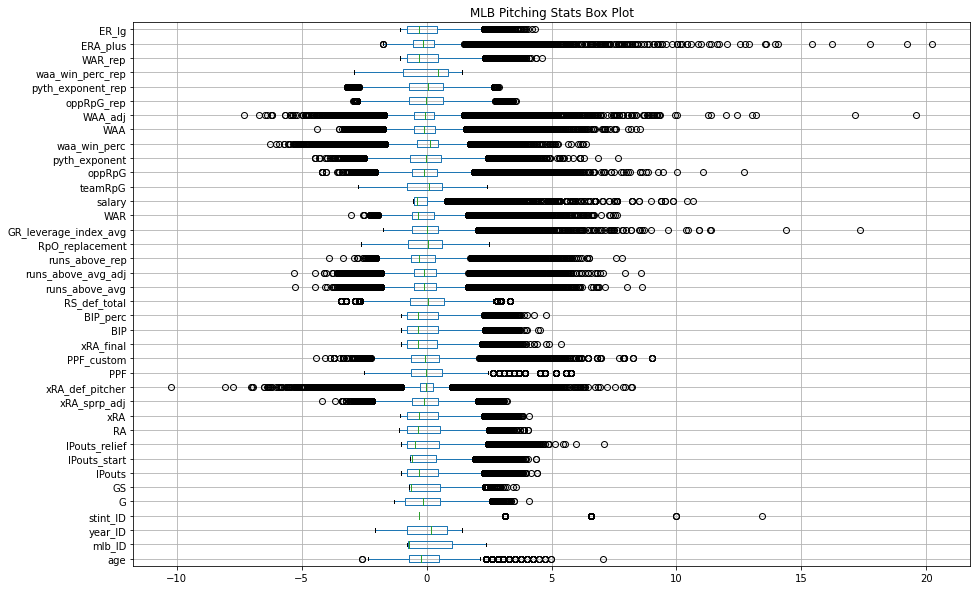

In [16]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Pitching Stats Box Plot')
plt.show()

**_The data clearly has not been scaled correctly. Lets see what 3 STD does_**

## 3 STD

In [17]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [18]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

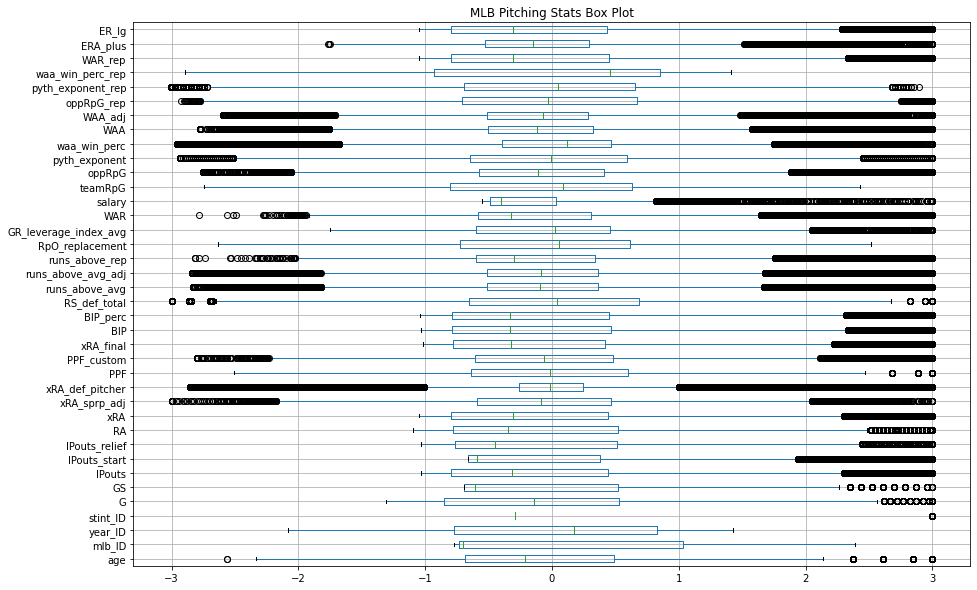

In [19]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Pitching Stats Box Plot')
plt.show()

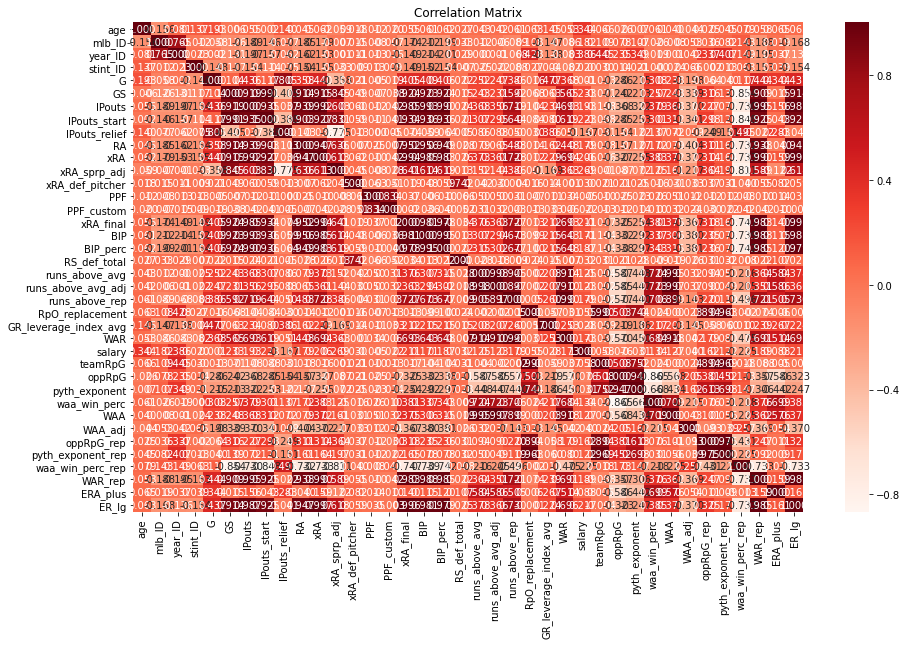

In [20]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [21]:
MLB_Ppipeline1=pd.concat([data_num_zs, data_objects], axis=1)

In [22]:
MLB_Ppipeline1.head()

,age,mlb_ID,year_ID,stint_ID,G,GS,IPouts,IPouts_start,IPouts_relief,RA,...,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg,name_common,player_ID,team_ID,lg_ID
0,-1.389691,1.016005,0.533333,-0.291071,-0.750094,-0.691458,-0.879806,-0.660259,-0.436480,-0.844777,...,0.041307,0.298511,0.972452,-0.899199,-0.650090,-0.875375,David Aardsma,aardsda01,SFG,NL
1,-0.919349,1.016005,0.652079,-0.291071,0.984657,-0.691458,-0.265126,-0.660259,1.174129,-0.315958,...,0.526358,0.805143,0.880929,-0.317943,0.170310,-0.150606,David Aardsma,aardsda01,CHC,NL
2,-0.684177,1.016005,0.711452,-0.291071,-0.035785,-0.691458,-0.565206,-0.660259,0.387847,-0.347065,...,0.595545,0.826253,0.692799,-0.508017,-0.522399,-0.491425,David Aardsma,aardsda01,CHW,AL
3,-0.449006,1.016005,0.770825,-0.291071,1.086701,-0.691458,-0.328046,-0.660259,1.009263,-0.098208,...,0.175407,0.425169,0.840252,-0.236661,-0.355122,-0.225782,David Aardsma,aardsda01,BOS,AL
4,-0.213835,1.016005,0.830198,-0.291071,2.413274,-0.691458,0.001073,-0.660259,1.871636,-0.378172,...,0.374732,0.636266,0.870760,0.145818,1.111190,0.057703,David Aardsma,aardsda01,SEA,AL


In [24]:
MLB_Ppipeline1.to_csv('../../Capstone/Data/MLB_Ppipeline1.csv', index=0)